In [1]:
import pandas as pd # Импортируем библиотеку Pandas для работы с данными в формате DataFrame
import numpy as np # Импортируем библиотеку NumPy для работы с числовыми данными

from sklearn.datasets import fetch_california_housing # Импортируем функцию fetch_california_housing из sklearn.datasets для загрузки датасета California Housing

from sklearn.model_selection import train_test_split # Импортируем функцию train_test_split из sklearn.model_selection для разделения данных на тренировочный и тестовый наборы

from sklearn.linear_model import HuberRegressor # Импортируем класс HuberRegressor из sklearn.linear_model для реализации регрессии методом Хьюбера
from sklearn.linear_model import LinearRegression # Импортируем класс LinearRegression из sklearn.linear_model для реализации линейной регрессии
from sklearn.preprocessing import PolynomialFeatures # Импортируем класс PolynomialFeatures из sklearn.preprocessing для генерации полиномиальных признаков
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score # Импортируем функцию mean_squared_error из sklearn.metrics для вычисления среднеквадратичной ошибки

from sklearn.preprocessing import StandardScaler # Импортируем класс StandardScaler из sklearn.preprocessing для стандартизации данных

import matplotlib.pyplot as plt # Импортируем модуль pyplot из библиотеки matplotlib для построения графиков
import seaborn as sns # Импортируем библиотеку seaborn для улучшения визуализации данных

import joblib
from pathlib import Path

from my_lib import *
from my_config import *

In [2]:
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 50) # Устанавливаем максимальное количество отображаемых столбцов равным 50
pd.set_option('display.max_rows', 20) # Устанавливаем максимальное количество отображаемых строк равным 20
pd.options.display.float_format = '{:.2f}'.format # Устанавливаем формат отображения чисел с двумя знаками после запятой
pd.options.mode.use_inf_as_na = True # Настройка режима Pandas для рассмотрения бесконечностей (inf) как пропущенных значений (NA)

# Конфигурация формата отображения графиков в виде векторных изображений
%config InlineBackend.figure_format = 'svg'

# для построения графиков внутри Jupyter Notebook
%matplotlib inline

In [3]:
scaler_name = 'NoScaler'
print(f"Scaler: {scaler_name}")
X_train =joblib.load(Path(result_foler, X_train_template_filename_after_split % scaler_name))
X_test = joblib.load(Path(result_foler, X_test_template_filename_after_split % scaler_name))
y_train =joblib.load(Path(result_foler, y_train_template_filename_after_split % scaler_name))
y_test = joblib.load(Path(result_foler, y_test_template_filename_after_split % scaler_name))
print(f'  {len(X_train)}, {len(X_test)}, {len(y_train)}, {len(y_test)}')


Scaler: NoScaler
  345195, 805458, 345195, 805458


In [4]:
X_train.sample(7)

,Age,Annual Income,Number of Dependents,Education Level,Health Score,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Customer Feedback,Exercise Frequency,Policy Start Year,Policy Start Month,Policy Start Day,Policy Start Weekday,Gender_Male,Marital Status_Married,Marital Status_Single,Occupation_Self-Employed,Occupation_Unemployed,Location_Suburban,Location_Urban,Property Type_Condo,Property Type_House,Smoking Status_Yes
460048,34.00,16054.00,3.00,3.00,38.87,0.00,0.00,19.00,434.00,5.00,0.00,3.00,2022,8,26,4,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00
184364,27.00,7073.00,2.00,3.00,13.94,0.00,0.00,14.00,734.00,8.00,1.00,3.00,2023,7,13,3,1.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00
640794,43.00,24897.00,4.00,2.00,37.96,0.00,1.00,15.00,757.00,7.00,2.00,3.00,2021,10,14,3,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,1.00
219356,28.00,16076.00,0.00,0.00,13.92,0.00,1.00,2.00,584.00,4.00,0.00,1.00,2020,7,2,3,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,1.00
174756,53.00,16891.00,3.00,3.00,10.83,2.00,0.00,15.00,434.00,1.00,1.00,1.00,2022,1,24,0,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00
911721,57.00,7073.00,2.00,2.00,12.66,0.00,0.00,2.00,431.00,2.00,2.00,1.00,2024,5,4,5,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00
491739,49.00,7991.00,4.00,3.00,12.94,2.00,1.00,7.00,695.00,2.00,0.00,0.00,2021,11,5,4,1.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00


In [5]:
y_train.sample(7)

1002861    708.00
1003610    907.00
344232    1551.00
656408    2512.00
95708     2176.00
666072     324.00
118176     677.00
Name: Premium Amount, dtype: float64

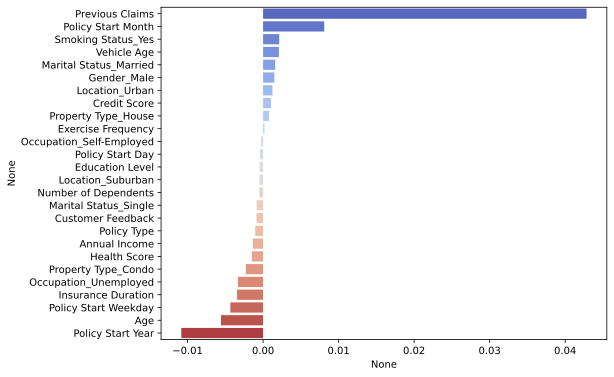

In [6]:
correlations = X_train.corrwith(y_train).sort_values(ascending=False)


plot = sns.barplot(y=correlations.index, x=correlations, hue = correlations.index, palette='coolwarm',  # Цветовая схема
                  orient='horizontal')
plot.figure.set_size_inches(8, 6)